# Half-Moon Semi-Supervised Learning

In [27]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture, neural_network
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import label_propagation
from itertools import cycle, islice

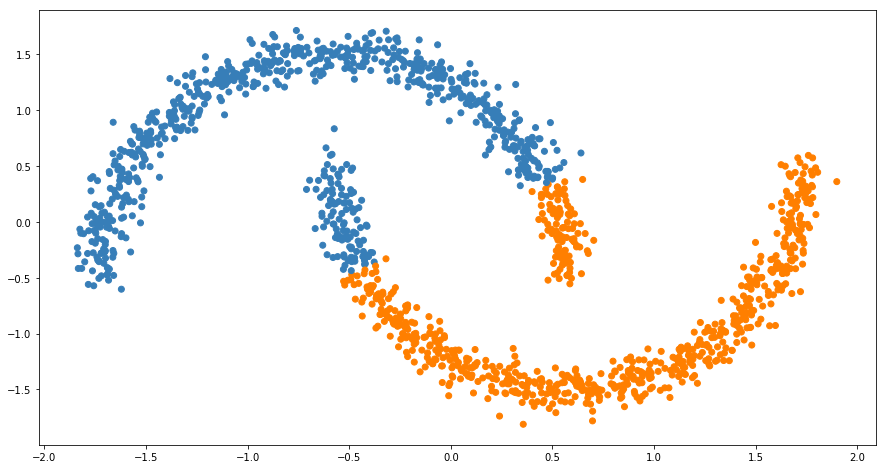

In [25]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X, y = noisy_moons
X = StandardScaler().fit_transform(X)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X)
y_pred = gmm.predict(X)

def plot(X, y_pred):
    fig, ax = plt.subplots(1, 1, figsize=(15,8))

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:,0], X[:,1], color=colors[y_pred])
    plt.show()
    
plot(X, y_pred)

0.9993333333333333


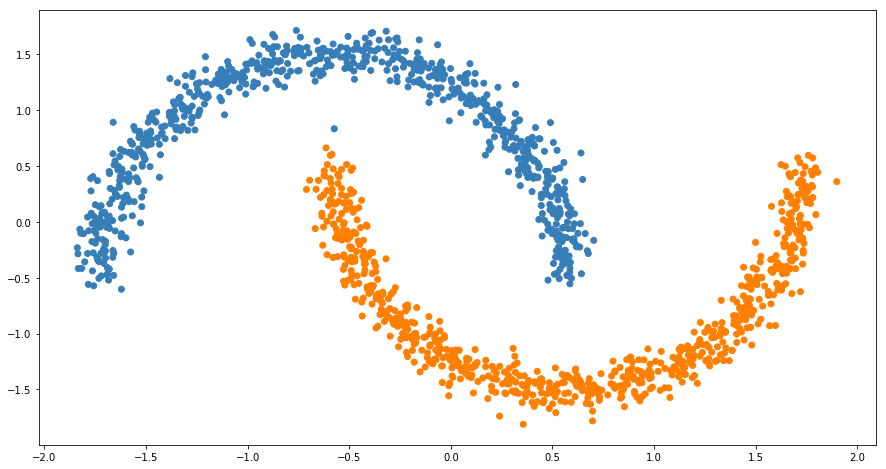

In [26]:
mlp = neural_network.MLPClassifier()
mlp.fit(X, y)
y_pred = mlp.predict(X)
acc = (y == y_pred).mean()

print(acc)
plot(X, y_pred)

### Label Propagation

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation()
iris = datasets.load_iris()
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
label_prop_model.fit(iris.data, labels)

print(iris.target)
print(labels)
label_prop_model.predict(iris.data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0  0  0  0 -1 -1 -1  0  0  0 -1  0  0 -1 -1 -1  0  0  0 -1  0 -1 -1  0
  0  0 -1  0  0 -1  0 -1 -1  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0
  0 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1
 -1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1 -1 -1  2  2  2  2 -1  2  2 -1 -1 -1 -1  2  2  2  2  2 -1  2  2
  2  2  2 -1 -1  2  2  2 -1  2  2 -1 -1  2  2  2  2  2  2  2  2 -1  2  2
 -1 -1  2  2 -1 -1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])